## Final Project Submission

Please fill out:
* Student name: Steven Jasper
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL: 


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# data manipulation, linear algebra, plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# modeling, stat analysis 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Feature engineering
from sklearn.feature_selection import RFE

# scaling
from sklearn.preprocessing import MinMaxScaler

import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Data Cleaning and Manipulation


Given a data set from King's County we will begin manipulating our dataset in order to optimize for analysis. We will begin by loading the data, previewing the data, and then we will begin our cleaning process.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

We can see above that there are some values that would not be able to be converted to a float. We would like this data to be a float so we can actually apply some statistical concepts to this series.

In [5]:
df.loc[df.sqft_basement == '?'] = 0

In [6]:
df['sqft_basement'] = df.sqft_basement.astype('float64')

Now that we converted our sqft_basement to a float, we want to take a look at other columns with data types that are not condusive to our analysis. The next one we will be converting is the date column, we would like this to be a datetime type vs an object type.

In [7]:
df['date'] = pd.to_datetime(df.date, infer_datetime_format = True)

In [8]:
df.date.describe()

count                   21597
unique                    373
top       1970-01-01 00:00:00
freq                      454
first     1970-01-01 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Our Data types are starting to come together much better, now we would like to begin replacing more placeholder values as seen above in our basement example.

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see above there are a few columns with undesirable data, we must interpret this data and then fill the null values with a valid placeholder value.

It is safe to assume that if the property has no waterfront the value will be 0, however what does NaN imply? I believe it would be safe to assume these too would be houses without waterfront qualities.

In [10]:
df.waterfront.head()

0       nan
1   0.00000
2   0.00000
3   0.00000
4   0.00000
Name: waterfront, dtype: float64

In [11]:
df['waterfront'] = df.waterfront.fillna(0)

In [12]:
df.waterfront.unique()

array([0., 1.])

Now that our waterfront property is looking quite a bit better, we would like to start looking at view, and yr_renovated. We will preview these, then determine what the best filler value will be for the set.

In [13]:
df['view'] = df.view.fillna(0)

In [14]:
df.view.unique()

array([0., 3., 4., 2., 1.])

In [15]:
df.yr_renovated.isna().sum()

3754

In [16]:
df['yr_renovated'] = df.yr_renovated.fillna(0)

In [17]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979., 1997.,
       1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968., 2012.,
       1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959., 1960.,
       1967., 1965., 1934., 1972., 1944., 1958.])

We utilized 0 as the baseline placeholder since these values will eventually be utilized in our analysis in a numerical sense. For yr_renovated 0 signifies that the house has not been renovated, while in view it means the house has not been viewed yet.

In [18]:
df.price.describe()

count     21597.00000
mean     529148.41459
std      372349.00379
min           0.00000
25%      315000.00000
50%      445000.00000
75%      638000.00000
max     7700000.00000
Name: price, dtype: float64

In [19]:
foo = df.loc[df.price < 10]

We can see above that we have a large amount of data that is basically blank. We will work to remove this invalid data once we validate that all of this data is legitimately incorrect.

In [20]:
foo.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000,454.00000
mean,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
std,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Above validates that this data is truly invalid as there are no values throughout our subset.

In [21]:
df = pd.merge(df, foo, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', 1)

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000,21143.00000
mean,4581004249.84827,540510.72743,3.37256,2.11608,2080.92073,15087.13782,1.49359,0.00672,0.23265,3.40992,7.65828,1789.06901,291.85172,1971.02322,68.25649,98077.86889,47.56027,-122.21388,1987.27139,12738.94197
std,2876328198.00068,368075.06437,0.92492,0.76853,918.54756,41209.20008,0.53925,0.08168,0.76406,0.65050,1.17425,828.40977,442.49834,29.32194,362.76583,53.53576,0.13859,0.14060,685.67034,27169.27366
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049307.00000,322000.00000,3.00000,1.75000,1430.00000,5043.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1200.00000,0.00000,1952.00000,0.00000,98033.00000,47.47125,-122.32800,1490.00000,5100.00000
50%,3904940140.00000,450000.00000,3.00000,2.25000,1910.00000,7620.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57200,-122.23000,1840.00000,7626.00000
75%,7309100170.00000,645000.00000,4.00000,2.50000,2550.00000,10695.50000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98117.00000,47.67820,-122.12500,2360.00000,10087.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


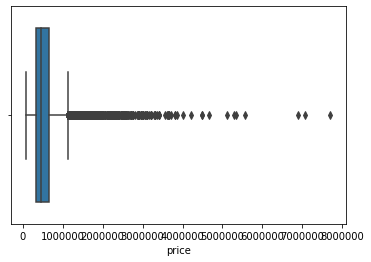

In [23]:
sns.boxplot(df.price)

We can see above, we have a large amount of quite aggressive outliers, this will lead to a non-normal distribution, we will begin to remove these. We will do this by taking the Z-Score of all the values for price, and remove values with large Z-Scores.

In [24]:
qual = ['date', 'id', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
quan = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,...,7,1180,0.00000,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,...,7,2170,400.00000,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,...,6,770,0.00000,1933,0.00000,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,...,7,1050,910.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,...,8,1680,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [36]:
qualDF = df[qual].copy()
quanDF = df[quan].copy()
quanDF.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,1180,0.00000,1340,5650
1,538000.00000,3,2.25000,2570,2170,400.00000,1690,7639
2,180000.00000,2,1.00000,770,770,0.00000,2720,8062
3,604000.00000,4,3.00000,1960,1050,910.00000,1360,5000
4,510000.00000,3,2.00000,1680,1680,0.00000,1800,7503


In [37]:
altdf = quanDF.copy()
# altdf = altdf.drop(columns = 'date', axis =1 )
z = np.abs(stats.zscore(altdf))
print(z)

[[0.86563392 0.40281161 1.45225804 ... 0.65957    0.94402027 0.26092378]
 [0.0068214  0.40281161 0.1742605  ... 0.24440958 0.43355882 0.18771435]
 [0.97947209 1.48401584 1.45225804 ... 0.65957    1.06865631 0.17214492]
 ...
 [0.37604558 1.48401584 1.77756174 ... 0.65957    1.41072788 0.39501224]
 [0.38175379 0.40281161 0.49956421 ... 0.65957    0.84192798 0.4215134 ]
 [0.58552139 1.48401584 1.77756174 ... 0.65957    1.41072788 0.41893689]]


In [29]:
threshold = 3
print(np.where(z>2.5))

(array([    1,     5,     5, ..., 21131, 21134, 21138]), array([14,  3,  4, ...,  6,  6,  6]))


In [38]:
quanDF = altdf[(z<2.5).all(axis=1)].copy()
df.shape

(16838, 20)

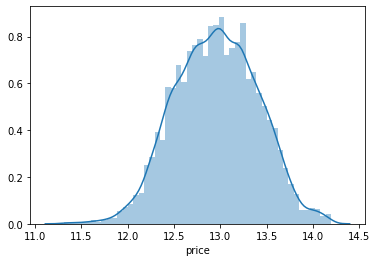

In [39]:
sns.distplot(np.log(df.price))

In [43]:
df = pd.concat([qualDF, quanDF], axis = 1)

In [44]:
df.head()

,date,id,waterfront,view,yr_built,yr_renovated,zipcode,lat,long,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,2014-10-13,7129300520,0.00000,0.00000,1955,0.00000,98178,47.51120,-122.25700,221900.00000,3.00000,1.00000,1180.00000,1180.00000,0.00000,1340.00000,5650.00000
1,2014-12-09,6414100192,0.00000,0.00000,1951,1991.00000,98125,47.72100,-122.31900,538000.00000,3.00000,2.25000,2570.00000,2170.00000,400.00000,1690.00000,7639.00000
2,2015-02-25,5631500400,0.00000,0.00000,1933,0.00000,98028,47.73790,-122.23300,180000.00000,2.00000,1.00000,770.00000,770.00000,0.00000,2720.00000,8062.00000
3,2014-12-09,2487200875,0.00000,0.00000,1965,0.00000,98136,47.52080,-122.39300,604000.00000,4.00000,3.00000,1960.00000,1050.00000,910.00000,1360.00000,5000.00000
4,2015-02-18,1954400510,0.00000,0.00000,1987,0.00000,98074,47.61680,-122.04500,510000.00000,3.00000,2.00000,1680.00000,1680.00000,0.00000,1800.00000,7503.00000


## Correlation Testing

Next we will test the correlation between our features in order to eliminate multicollinearity.

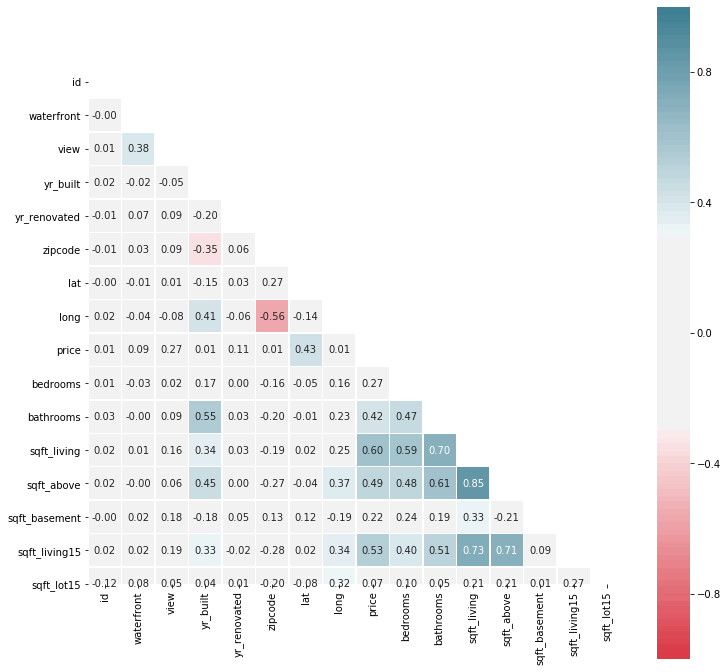

In [46]:
plt.figure(figsize= (12,12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, center = 0, vmin = -1, vmax = 1, square=True, linewidths=.5, annot = True, fmt='.2f' ,cmap=sns.diverging_palette(10,220,sep = 80, n = 100))

We can see above that there are a few features which should not be considered if we are to avoid multicollinearity. sqft_living and sqft_above seem to be heavily correlated, along with sqft_lot and sqft_lot15. We will omit any features with an r value greater than .80 to avoid the chance of ruining our analysis via multicollinearity.

In [47]:
df.drop('sqft_above', axis = 1, inplace = True)

# Exploratory Analysis

Here we will begin to analyze different features to answer a few of our questions about the data set.

1. How has the average price been affected over time?
2. Were waterfront properties build around the same time?
3. How does location in the county affect the price?
4. How does the age of the house affect the grade?

## How has the average price been affected over time?

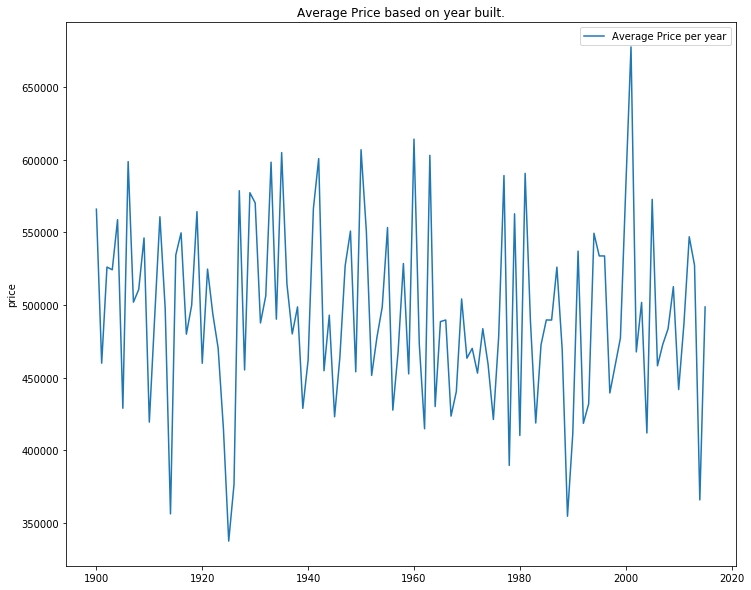

In [48]:
plt.figure(figsize = (12,10))
years = df['yr_built'].unique()
prices = df.groupby('yr_built').price.mean()
plt.title('Average Price based on year built.')
sns.lineplot(years, prices, label='Average Price per year')

This graph shows that there seems to be little affect on the price for the age of the house. However this fails to take into account if the house has been renovated. Below we will explore that feature as well.

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 1980., 1971., 1979., 1997.,
       1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968., 2012.,
       1963., 1951., 1962., 2001., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1975., 1964., 1973., 1957., 1959., 1960.,
       1967., 1965., 1934., 1972., 1944., 1958.])